# Diverse Meat Consumption Trends: An In-Depth Exploration of Beef, Pig, and Poultry Dynamics Across Australia, Japan, and South Africa

In this data analysis, I delved into the consumption trends of beef and pig meat, drawing comparisons between Australia and Japan, as well as exploring poultry consumption in South Africa over specific timeframes. In the 1990s, Australia saw a gradual rise in beef consumption from just above 25 kilograms per capita, while Japan maintained stability around 8 kilograms per capita. Moving into the 2000s, both countries experienced shifts, with Australia showcasing fluctuations and Japan sustaining a slight decrease. Throughout the final decade, Australia's beef consumption experienced a slight decline but remained above 15 kilograms per capita, signaling potential shifts in dietary preferences. Similarly, pig consumption patterns mirrored those of beef, with Australia gradually increasing from the 1990s and Japan undergoing a moderate uptick. Shifting the focus to South Africa, I scrutinized poultry consumption trends from 1994 to 2014, noting an overall upward trajectory with occasional spikes, as indicated by statistical measures. Additionally, I constructed a predictive model for poultry consumption in South Africa, revealing a robust fit with an impressive R-squared value of 0.96. This underscores the model's accuracy in capturing and replicating the underlying consumption trends. In essence, my analysis provides a comprehensive exploration of meat consumption dynamics across various regions and timeframes.

In [1]:
import pandas as pd
data_csv = 'DP_LIVE_28102023202222314.csv'
df = pd.read_csv(data_csv)

print(df)

      LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME   Value  \
0          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000   
1          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.942   
2          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.405   
3          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.370   
4          AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.662   
...        ...          ...     ...     ...       ...   ...     ...   
12155      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2025   3.861   
12156      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2026   3.847   
12157      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2027   3.836   
12158      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2028   3.826   
12159      GBR  MEATCONSUMP   SHEEP  KG_CAP         A  2029   3.814   

       Flag Codes  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
12155  

During the 1990s, the beef consumption trends in Australia and Japan showed distinct patterns. Australia began the decade with relatively low beef consumption, just above 25 kilograms per capita, but gradually saw a steady rise in consumption. In contrast, Japan maintained a stable trend during the early 1990s, with beef consumption hovering around 8 kilograms per capita.

Moving into the 2000s, both countries experienced shifts in their beef consumption. Australia witnessed fluctuations in consumption throughout the decade. Meanwhile, Japan stayed consistent with a slight decrease at the beginning of 2000.

In the final decade, from 2010 to 2020, Australia's beef consumption exhibited a slight decline, although it remained above the 15 kilograms per capita mark. This decline suggested potential changes in dietary preferences or other factors influencing consumption. On the other hand, Japan continued stay consistent and steady.

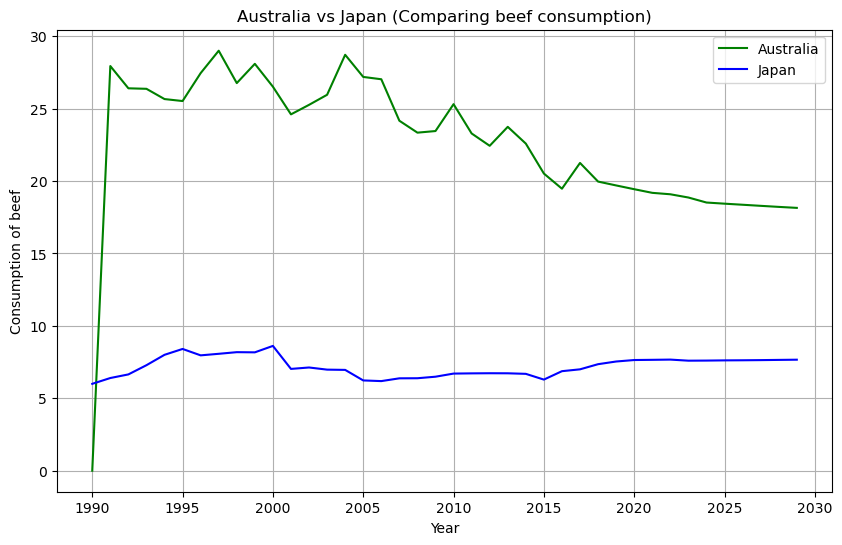

In [2]:
import matplotlib.pyplot as plt

aus_beef_value = df[(df['LOCATION'] == 'AUS') 
                  & (df['SUBJECT'] == 'BEEF') 
                  & (df['MEASURE'] == 'KG_CAP')]
jpn_beef_value = df[(df['LOCATION'] == 'JPN') 
                  & (df['SUBJECT'] == 'BEEF') 
                  & (df['MEASURE'] == 'KG_CAP')]

time_aus = aus_beef_value['TIME']
aus_beef_value = aus_beef_value['Value']
jpn_beef_value = jpn_beef_value['Value']

plt.figure(figsize=(10, 6))
plt.plot(time_aus, aus_beef_value, label='Australia', color='green')
plt.plot(time_aus, jpn_beef_value, label='Japan', color='blue')
plt.xlabel('Year')
plt.ylabel('Consumption of beef')
plt.title('Australia vs Japan (Comparing beef consumption)')
plt.legend()
plt.grid(True)

plt.show()


The graph compares pig consumption between Australia (purple line) and Japan (orange line) in kilograms per capita over time. Both countries have a similar pattern with Australia starting at a lower consumption level and increasing significantly.

In the 1990s, Australia began with pig consumption around 15 kilograms per capita, showing gradual, yet stable, growth. In contrast, Japan maintained a consistent trend at approximately 13 kilograms per capita during the same period. The 2000s brought shifts in both countries' consumption habits, with Australia experiencing fluctuations and an overall increase to over 20 kilograms per capita, while Japan departed from its stability with a moderate consumption uptick. 

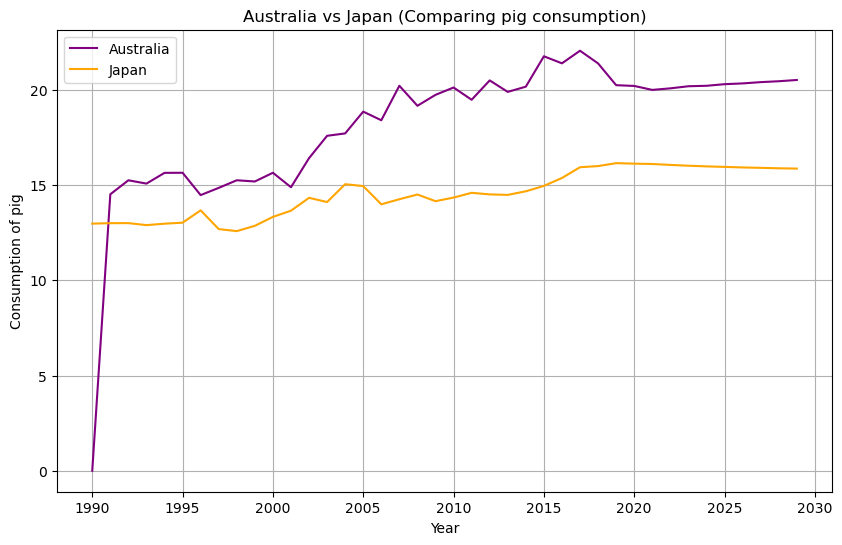

In [3]:
aus_pig = df[(df['LOCATION'] == 'AUS') 
             & (df['SUBJECT'] == 'PIG') 
             & (df['MEASURE'] == 'KG_CAP')]
jpn_pig = df[(df['LOCATION'] == 'JPN') 
             & (df['SUBJECT'] == 'PIG') 
             & (df['MEASURE'] == 'KG_CAP')]

aus_pig_value = aus_pig['Value']
jpn_pig_value = jpn_pig['Value']

plt.figure(figsize=(10, 6))
plt.plot(time_aus, aus_pig_value, label='Australia', color='purple')
plt.plot(time_aus, jpn_pig_value, label='Japan', color='orange')
plt.xlabel('Year')
plt.ylabel('Consumption of pig')
plt.title('Australia vs Japan (Comparing pig consumption)')
plt.grid(True)  

plt.legend()
plt.show()


Showing the years and corresponding poultry consumption values for South Africa within the specified time frame and measurement unit. This allows for further analysis and visualization of poultry consumption trends in South Africa during that period.

In [4]:
poultry_for_south_africa = df[(df['SUBJECT'] == 'POULTRY') 
                          & (df['LOCATION'] == 'ZAF') 
                          & (df['TIME'] >= 1994) 
                          & (df['TIME'] <= 2014)
                          & (df['MEASURE'] == 'THND_TONNE')]  

poultry_for_south_africa = poultry_for_south_africa[['TIME', 'Value']]

print(poultry_for_south_africa)


      TIME     Value
6444  1994   628.900
6445  1995   709.422
6446  1996   710.258
6447  1997   780.825
6448  1998   725.003
6449  1999   800.037
6450  2000   894.465
6451  2001   953.234
6452  2002  1003.441
6453  2003  1046.535
6454  2004  1084.411
6455  2005  1162.906
6456  2006  1262.309
6457  2007  1399.705
6458  2008  1547.519
6459  2009  1598.910
6460  2010  1671.001
6461  2011  1772.399
6462  2012  1829.434
6463  2013  2009.806
6464  2014  2113.786


The mean value being larger than the median in the extracted poultry consumption data for South Africa from 1994 to 2014 indicates that the data is positively skewed which means that there are some relatively high consumption values that pull the mean upward, causing it to be greater than the median.

The positive skew suggests that there are some spikes in poultry consumption,  most likely due to specific events or years with unusually high values. These high outliers result in a rightward tail in the data distribution, causing the mean to be influenced by these extreme values and pushed higher, while the median remains more resilient against outliers.

In [5]:
# Calculates the median value of poultry consumption
value_of_median = round(poultry_for_south_africa['Value'].median(), 2)
print("The median value is:", value_of_median)

# Calculates the mean value of poultry consumption
value_of_mean = round(poultry_for_south_africa['Value'].mean(), 2)
print("The mean value is:", value_of_mean)

# Calculates the range value of poultry consumption
value_of_range = round(poultry_for_south_africa['Value'].max() - poultry_for_south_africa['Value'].min(), 2)
print("The range is:", value_of_range)


The median value is: 1084.41
The mean value is: 1224.01
The range is: 1484.89


The graph represents the poultry consumption in South Africa measured in thousand tonnes of carcass weight from 1994 to 2014. The line chart displays the trend in poultry consumption over this 21-year period. The data points, marked by circular markers 'o', are connected by lines '-' to visualize the consumption pattern. The consumption appears to show an increasing trend, with some fluctuations over the years.

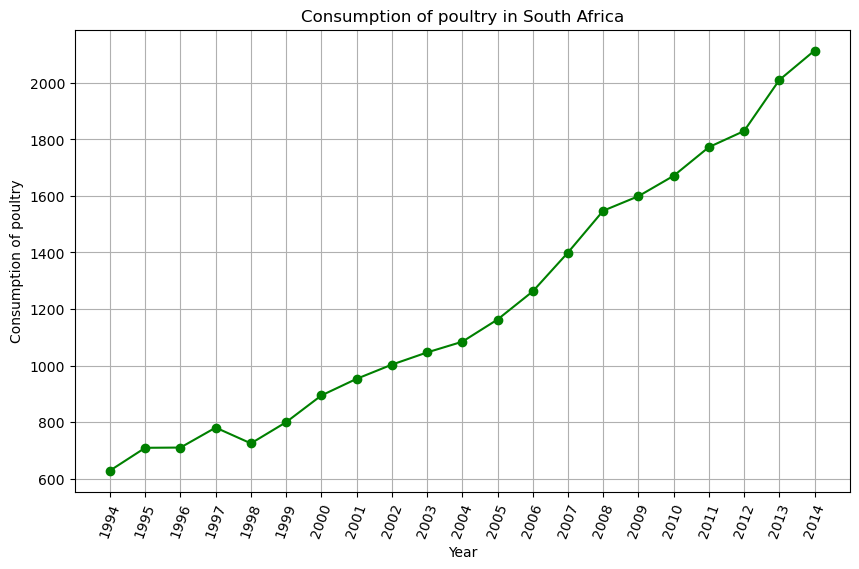

In [6]:
import matplotlib.pyplot as plt

poultry_for_south_africa = df[(df['SUBJECT'] == 'POULTRY') 
                              & (df['LOCATION'] == 'ZAF') 
                              & (df['TIME'] >= 1994)
                              & (df['TIME'] <= 2014)
                              & (df['MEASURE'] == 'THND_TONNE')]

years_poultry = poultry_for_south_africa['TIME'].astype(int) 
poultry_values = poultry_for_south_africa['Value']

poultry_values = poultry_values.round(2)

plt.figure(figsize=(10, 6))
plt.plot(years_poultry, poultry_values, marker='o', linestyle='-', color='green')
plt.title('Consumption of poultry in South Africa')
plt.xlabel('Year')
plt.ylabel('Consumption of poultry')
plt.grid(True)

plt.xticks(years_poultry)
plt.xticks(rotation=70)

plt.show()


The graph depicts the poultry consumption in South Africa measured in thousand tonnes from 1994 to 2014, denoted by the blue dots. It further encompasses forecasts for the years 2015 and 2016, indicated by purple dots.

The blue dot scatterplot reflects the historical trajectory of poultry consumption while the purple dots representing the model's predictions align with this ascending trend, suggesting a continuation of the established consumption pattern.

Overall, it allows for an assessment of the model's accuracy in predicting future consumption patterns, highlighting its ability to capture and replicate the underlying consumption trends.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


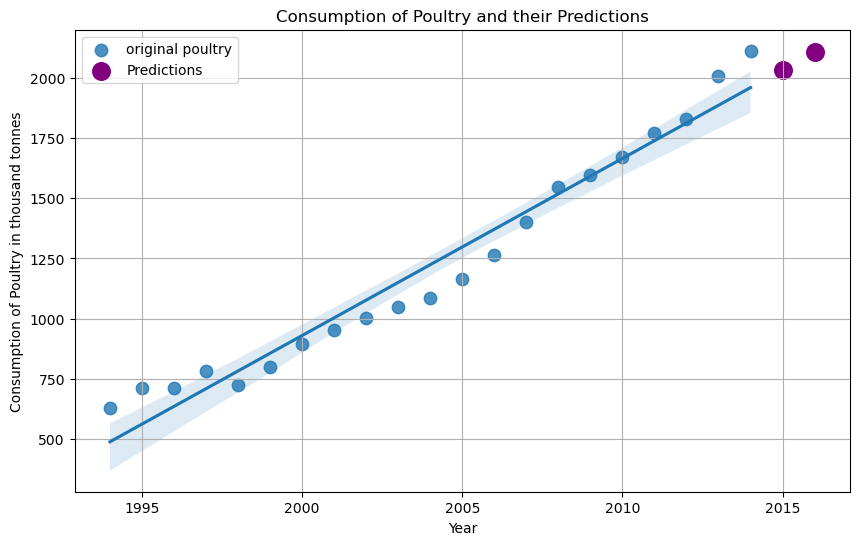

In [7]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()

model_reg.fit(poultry_for_south_africa[['TIME']], 
              poultry_for_south_africa['Value'])

prediction_years = [2015, 2016]
predictions = model_reg.predict([[year] for year in prediction_years])
# Round the predictions to two decimal places
predictions = [round(pred, 2) for pred in predictions]

plt.figure(figsize=(10, 6))
sns.regplot(data=poultry_for_south_africa, x='TIME', y='Value', scatter_kws={"s": 80}, label='original poultry')
plt.scatter(prediction_years, predictions, color='purple', marker='o', s=160, label='Predictions')

plt.xlabel('Year')
plt.ylabel('Consumption of Poultry in thousand tonnes')
plt.title('Consumption of Poultry and their Predictions')
plt.legend()
plt.grid(True)
plt.show()


The R-squared value falls within the 0 to 1 range, with higher values denoting a superior model fit. In this instance, the R-squared value of 0.96 signifies a robust linear connection between the years and poultry consumption, suggesting that the model is a good fit for the data.

In [8]:
r_squared_value = round(model_reg.score(poultry_for_south_africa[['TIME']], 
                                  poultry_for_south_africa['Value']), 2)

print('Value for r-square is ->', r_squared_value)


Value for r-square is -> 0.96
